<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 60px; display: inline" alt="SizingLab" /></a>

# Evaluation and optimization of a multi-rotor drone

*Written by Marc Budinger (INSA Toulouse), Scott Delbecq (ISAE-SUPAERO) and Félix Pollet (ISAE-SUPAERO), Toulouse, France.*

We will now use the [OpenMDAO framework](https://openmdao.org/) to solve and optimize the configuration. We use here the SLSQP algorithm, a gradient-based optimizer. A course on Multidisplinary Gradient optimization algorithms and gradient optimization algorithm is given [here](http://mdolab.engin.umich.edu/sites/default/files/Martins-MDO-course-notes.pdf):
> Joaquim R. R. A. Martins (2012). A Short Course on Multidisciplinary Design Optimization. University of Michigan

In [1]:
import fastoad.api as oad
from utils.plots import *

CONFIGURATION_FILE = './openmdao/multirotor_mdo.yaml'
SOURCE_FILE = './openmdao/problem_inputs_ref.xml'
INPUT_FILE = './openmdao/problem_inputs.xml'
OUTPUT_FILE = './openmdao/problem_outputs.xml'

In [2]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

'/home/sdelbecq/PycharmProjects/multirotor_sizing_isae_coa_2022/openmdao/problem_inputs.xml'

In [3]:
N2_FILE = './openmdao/n2.html'
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=N2_FILE, width='100%', height='500px')

In [4]:
oad.variable_viewer(INPUT_FILE)

In [5]:
optim_problem = oad.optimize_problem(CONFIGURATION_FILE, overwrite=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: [10.37875131]
            Iterations: 15
            Function evaluations: 42
            Gradient evaluations: 14
Optimization Complete
-----------------------------------


In [6]:
oad.optimization_viewer(CONFIGURATION_FILE)

/home/sdelbecq/PycharmProjects/multirotor_sizing_isae_coa_2022/venv/lib/python3.8/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [7]:
oad.variable_viewer(OUTPUT_FILE)

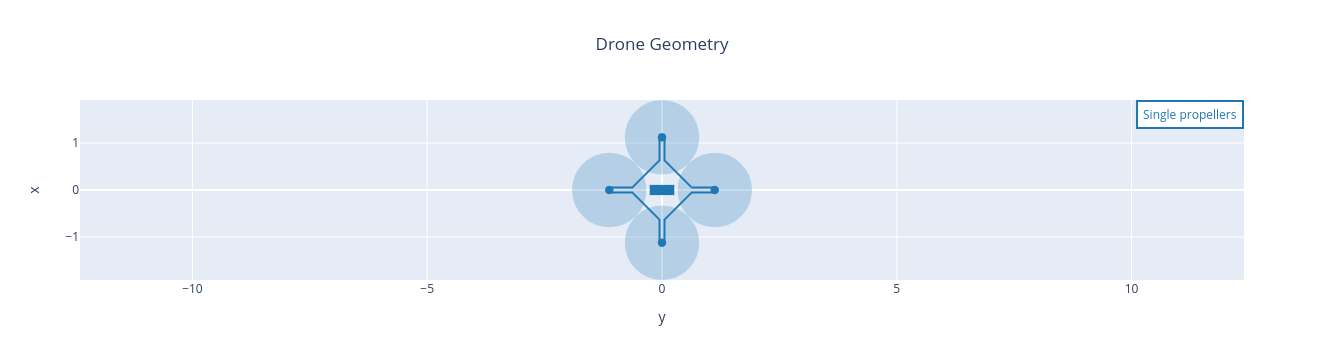

In [9]:
fig = drone_geometry_plot(OUTPUT_FILE, name='Drone MDO')
fig.show()

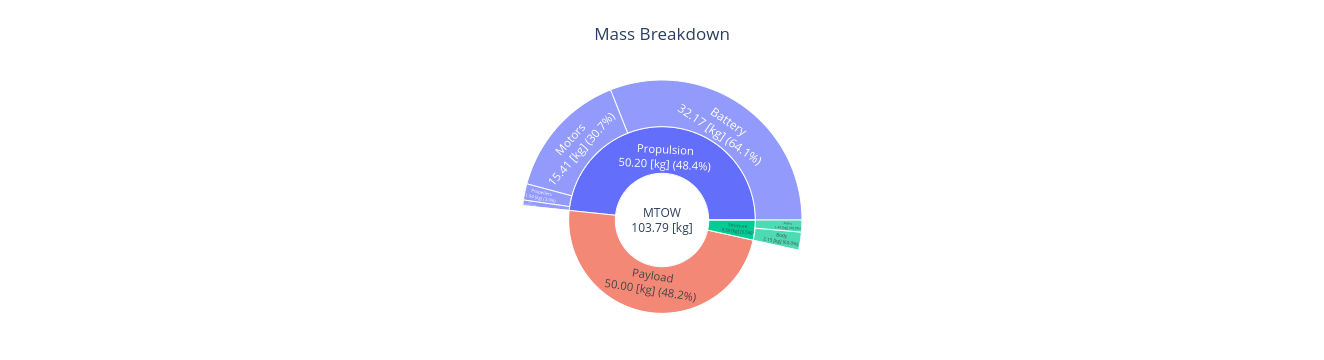

In [10]:
fig = mass_breakdown_sun_plot_drone(OUTPUT_FILE)
fig.show()